Nama : Arya Ajisadda Haryanto

NIM  : 24060122140118

LAB  : Machine Learning C1

# Praktikum

## 1. Import Dataset

In [14]:
# Import library
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Set style dan ukuran grafik
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')

# Import dataset
# Sesuaikan dengan lokasi file xclara.csv di komputer Anda
data = pd.read_csv('/content/drive/MyDrive/Akademik/Dataset/xclara.csv')

# Print informasi dataset
print(data.shape)  # Menampilkan ukuran dataset (jumlah baris dan kolom)
print(data.head(20))  # Menampilkan 20 baris pertama data

(3000, 2)
           V1         V2
0    2.072345  -3.241693
1   17.936710  15.784810
2    1.083576   7.319176
3   11.120670  14.406780
4   23.711550   2.557729
5   24.169930  32.024780
6   21.665780   4.892855
7    4.693684  12.342170
8   19.211910  -1.121366
9    4.230391  -4.441536
10   9.127130  23.605720
11   0.407503  15.297050
12   7.314846   3.309312
13  -3.438403 -12.025270
14  17.639350  -3.212345
15   4.415292  22.815550
16  11.941220   8.122487
17   0.725853   1.806819
18   8.185273  28.132600
19  -5.773587   1.024800


Plot Dataset

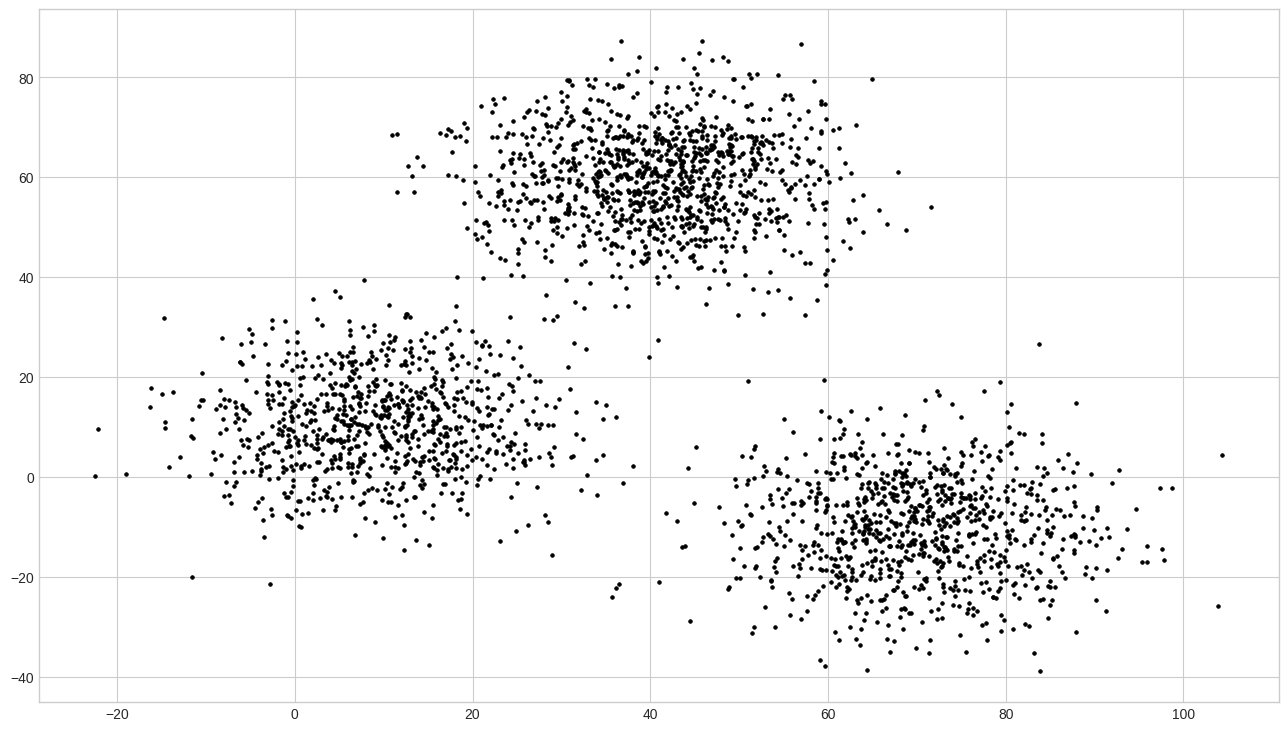

In [ ]:
# Plot Dataset
f1 = data['V1'].values
f2 = data['V2'].values
x = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

Melakukan Clustering

In [ ]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
# Fitting model
kmeans = kmeans.fit(x)
# Menampilkan cluster
labels = kmeans.predict(x)
C = kmeans.cluster_centers_
# Mencetakn nilai centroid
print(C)

[[ 69.92418447 -10.11964119]
 [ 40.67388108  59.69196349]
 [  9.45577774  10.66209744]]


Plot Hasil Clustering

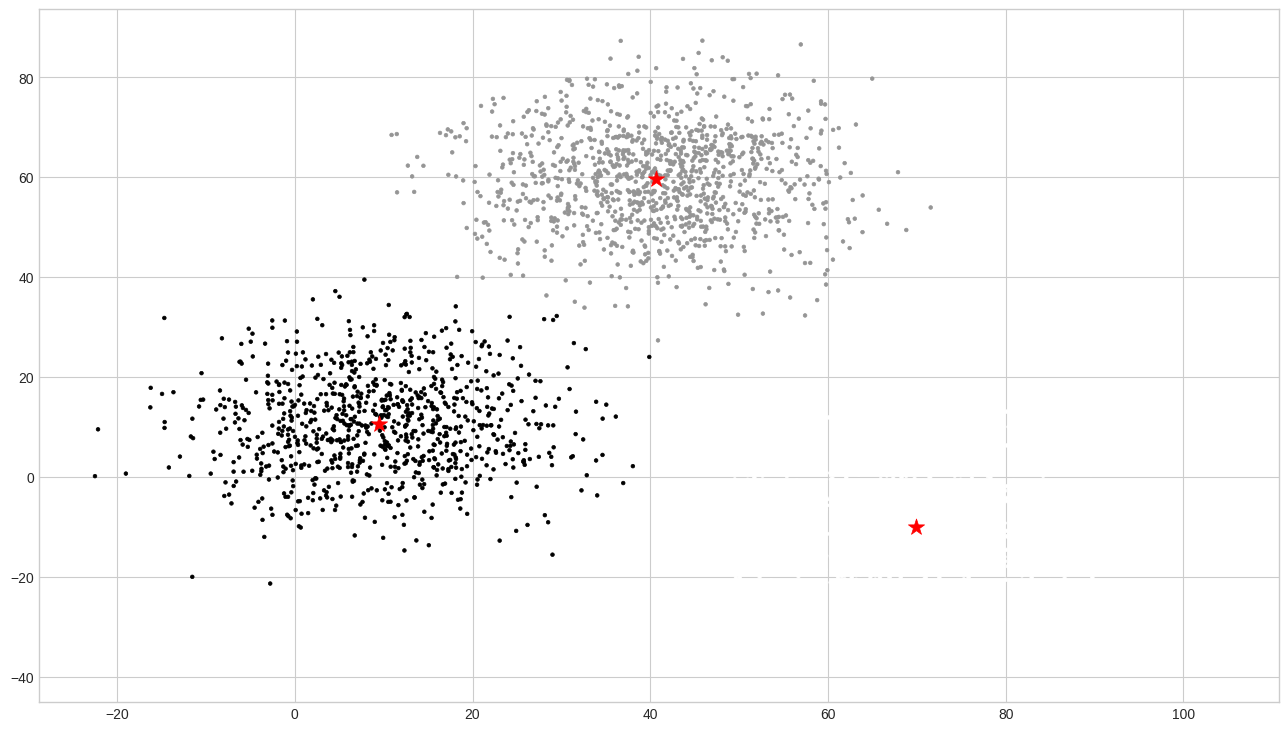

In [ ]:
# Plot Hasil Clustering
plt.scatter(f1, f2, c=labels, s=7)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='red', s=150)

## II Melakukan Clustering Menggunakan Generate Dataset

1. Mengenerate Dataset

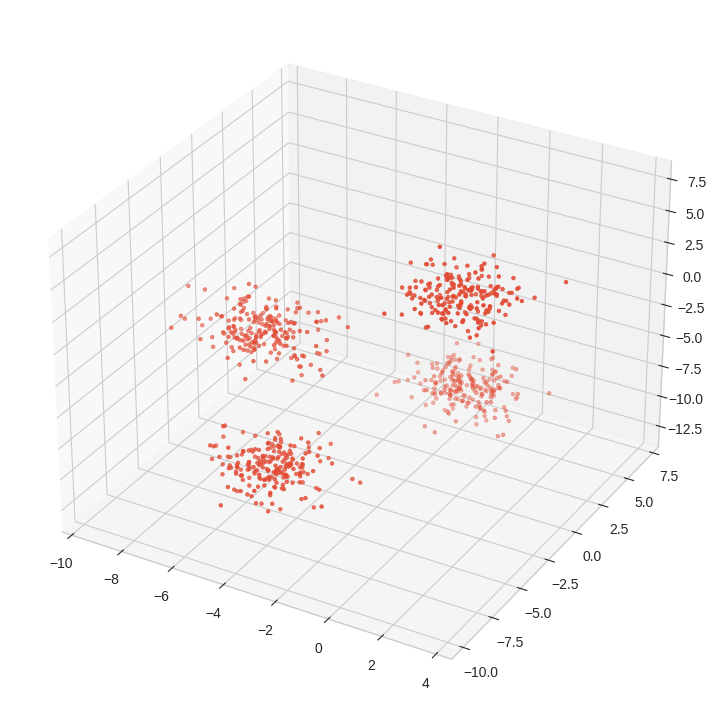

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Set ukuran grafik
plt.rcParams['figure.figsize'] = (16, 9)

# Men-generate dataset yang terkelompok dalam 4 cluster
X, y = make_blobs(n_samples=800, n_features=3, centers=4, random_state=1)

# Membuat plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=7)
plt.show()

2. Melakukan Clustering

In [ ]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting model
kmeans = kmeans.fit(X)
# Menampilkan cluster
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

3. Plot Hasil Clustering

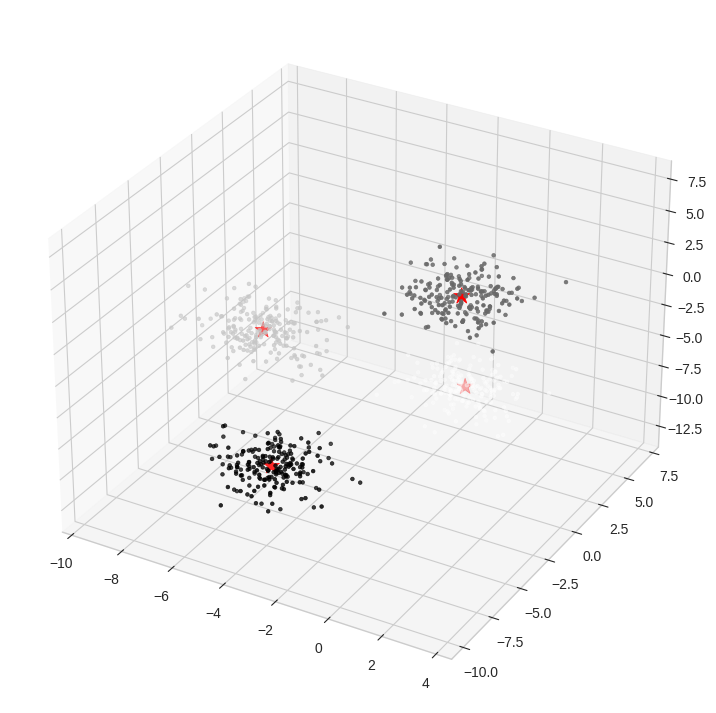

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, s=7)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='red', s=150)

## III Melakukan Evaluasi Hasil Clustering

In [ ]:
for k in range(1, 10):
  # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k)
  # Fitting model
  kmeans = kmeans.fit(X)
  # Menampilkan cluster
  labels = kmeans.predict(X)
  # Menampilkan inertia
  intertia = kmeans.inertia_
  print("k:" ,k, " cost:", intertia)

k: 1  cost: 44014.557684029685
k: 2  cost: 24760.507276619726
k: 3  cost: 10622.715931775056
k: 4  cost: 2407.3910793453674
k: 5  cost: 2261.438940498447
k: 6  cost: 2136.8764732062346
k: 7  cost: 1965.837302902184
k: 8  cost: 1894.6542128366032
k: 9  cost: 1742.2357611184998


Evaluasi Hasil Cluster Menggunakan Silhouette Score

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.22380110394991096

## Elbow Method

In [1]:
%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend
import matplotlib.pyplot as plt
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
plt.style.use('seaborn-v0_8-whitegrid')
# Seaborn style on matplotlib plot, menentukan jenis graph. untuk jenis graph lain bisa dilihat di
# https://python-graph-gallery.com/199-matplotlib-style-sheets/
import numpy as np
from sklearn.cluster import KMeans

## 1. Importing Library

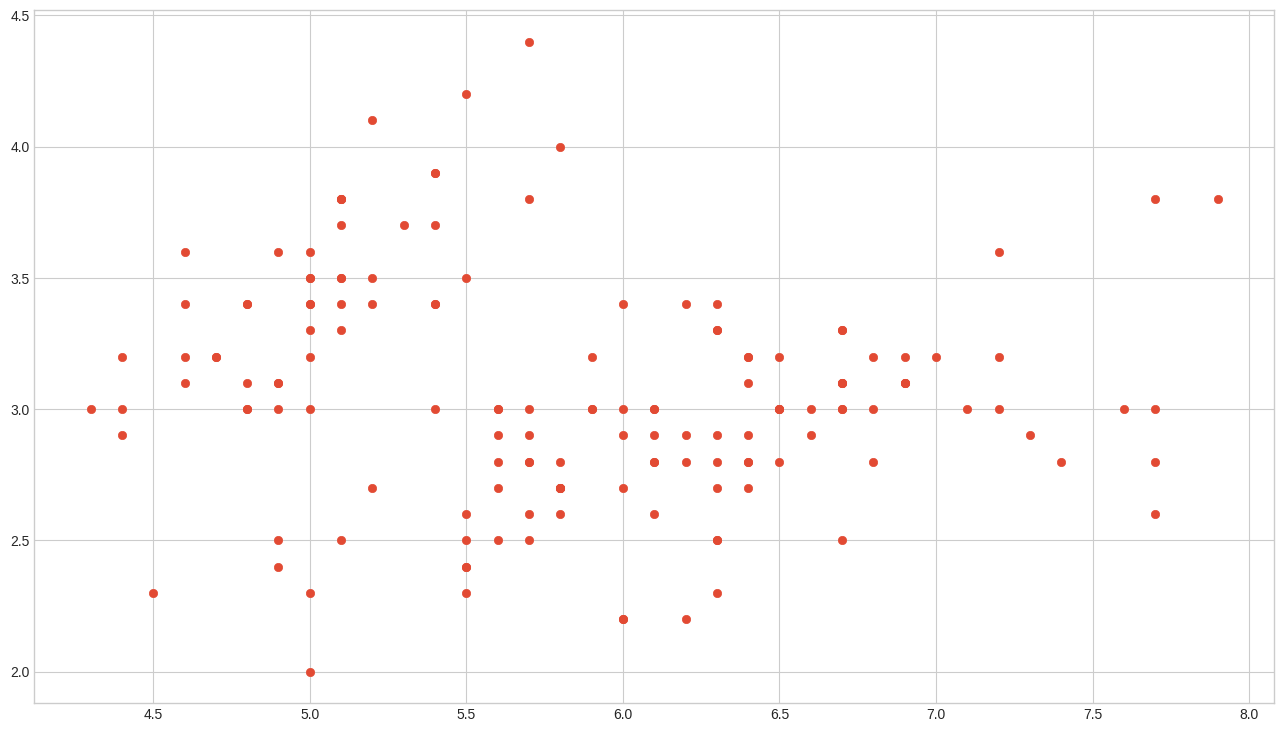

In [ ]:
# Membuat dataset
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data.T  # Mengambil data dari fitur data iris

# Visualisasi data
plt.plot()
plt.scatter(features[0], features[1])  # 2 fitur yang akan dipakai
plt.show()

# Catatan: jika ingin mencetak/memahami data iris, di baris paling bawah bisa diketik:
# iris (atau iris.data, atau iris.target_names)

In [ ]:
X = np.array(list(zip(features[0], features[1]))).reshape(len(features[1]), 2)
SSE = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    SSE.append(kmeanModel.inertia_)

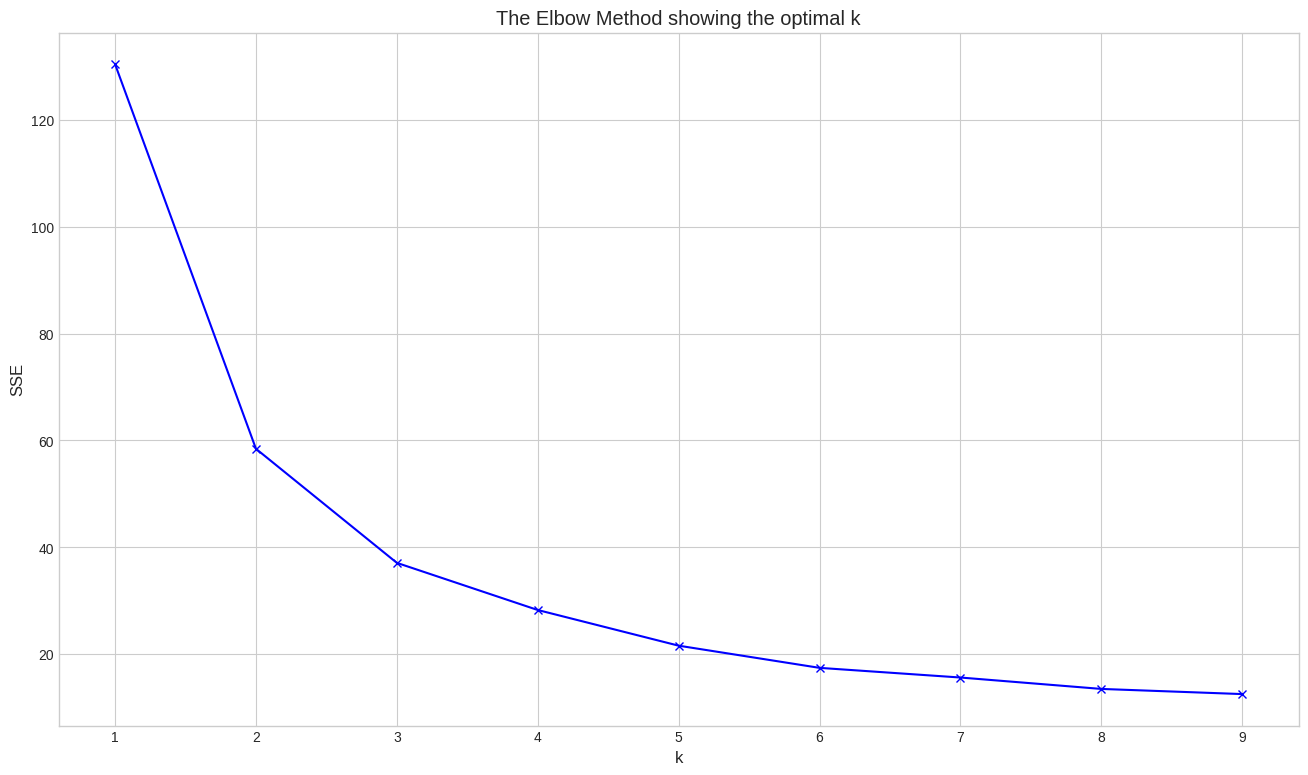

In [ ]:
# Plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

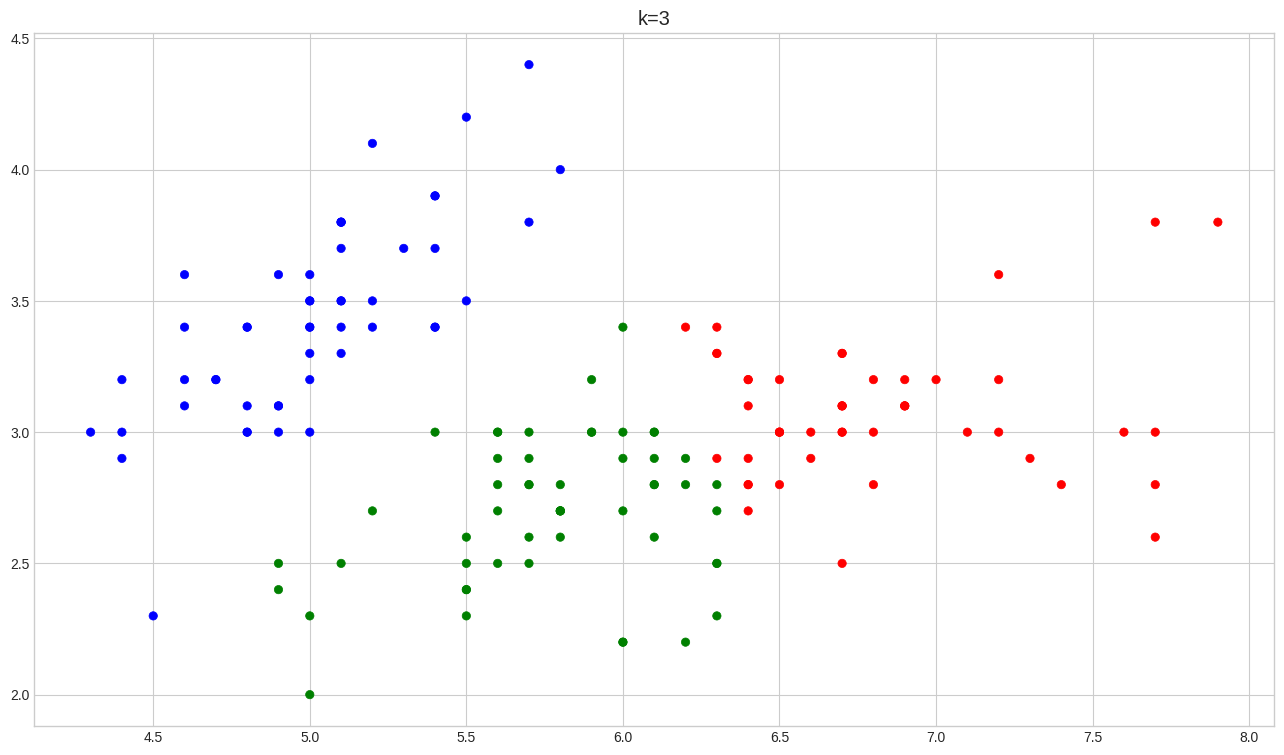

In [ ]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

LABEL_COLOR_MAP = {
    0: 'r',
    1: 'g',
    2: 'b'
}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features[0], features[1], c=label_color)
plt.title("k=3")
plt.show()

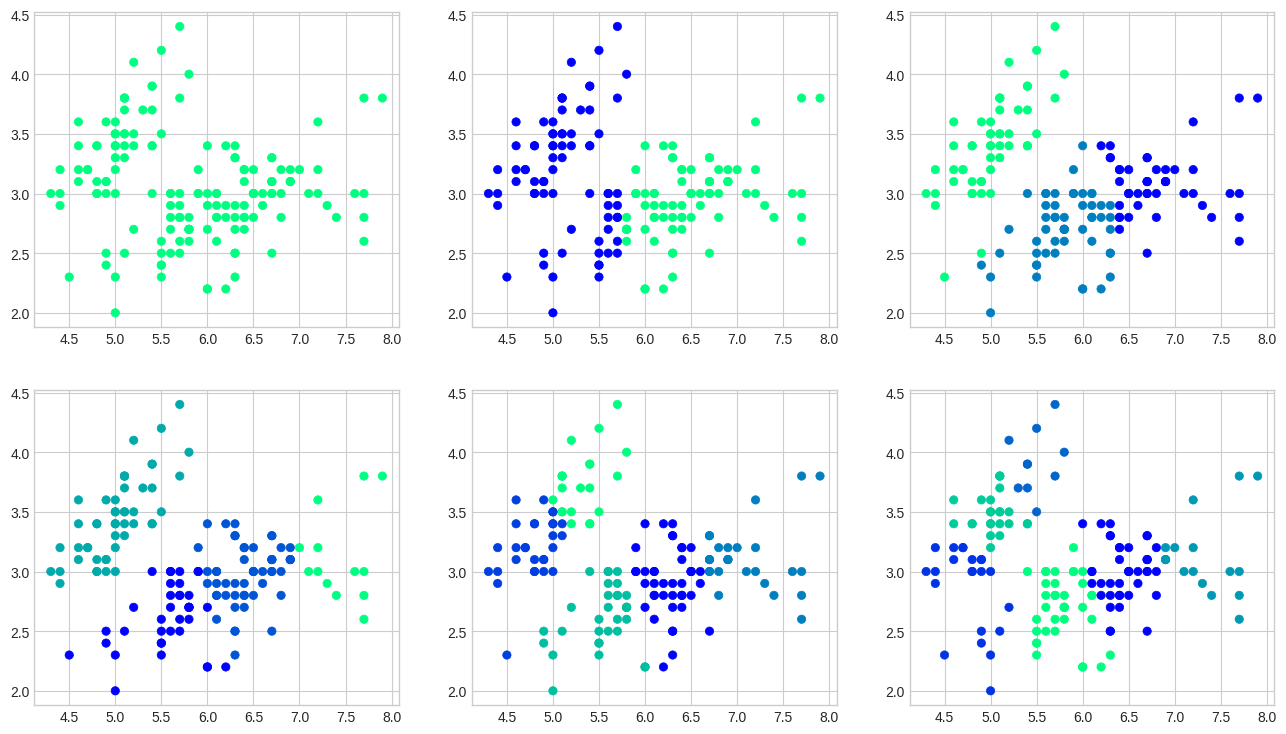

In [ ]:
figure, ax = plt.subplots(2, 3)
K = range(1, 7)

for k in K:
    if k < 4:
        row = 0
        column = k - 1
    else:
        row = 1
        column = k - 4

    kmeanModel = KMeans(n_clusters=k).fit(X)
    y_pred = kmeanModel.fit_predict(X)
    ax[row][column].scatter(features[0], features[1], c=y_pred, cmap='winter_r')

plt.show()

# Tugas 2

## Clustering Menggunakan Dataset iris menggunakan fitur 2 dan 3

In [8]:
%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend
import matplotlib.pyplot as plt
# Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
plt.style.use('seaborn-v0_8-whitegrid')
# Seaborn style on matplotlib plot, menentukan jenis graph. untuk jenis graph lain bisa dilihat di
# https://python-graph-gallery.com/199-matplotlib-style-sheets/
import numpy as np
from sklearn.cluster import KMeans

## 1. Import Library

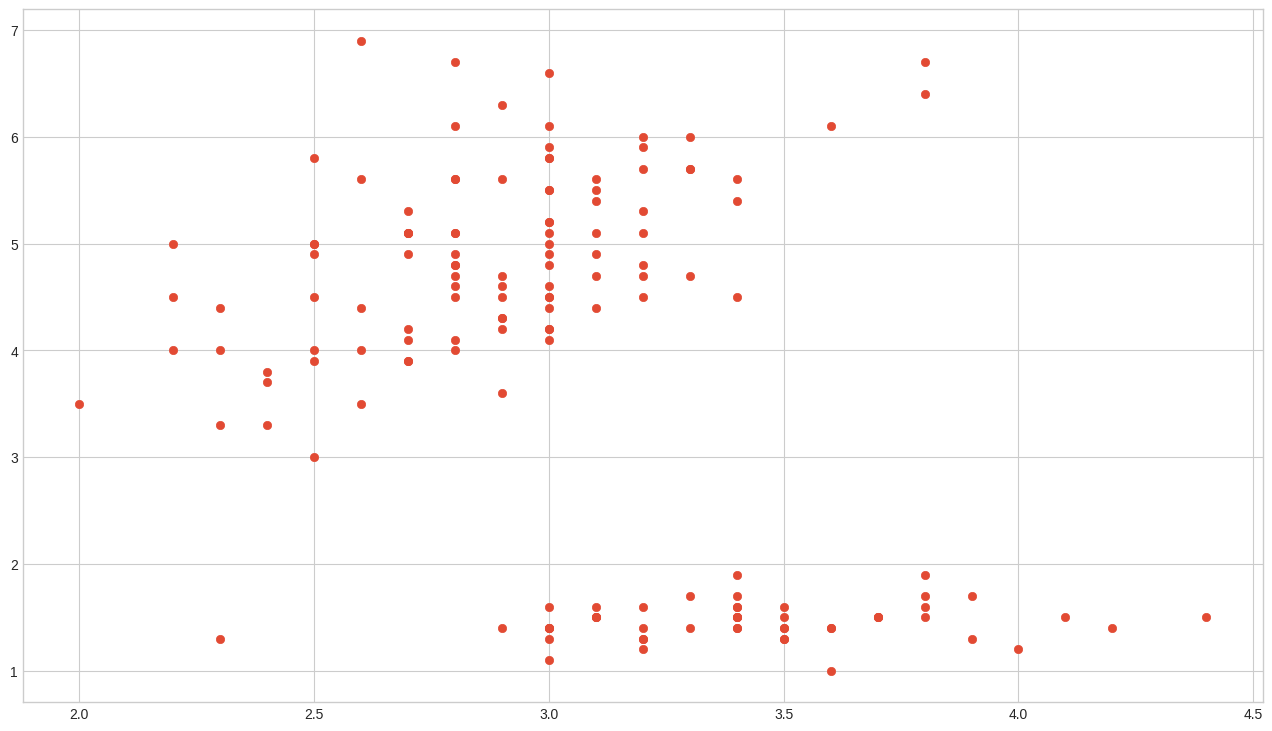

In [22]:
# Membuat dataset
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data.T  # Mengambil data dari fitur data iris

# Visualisasi data
plt.plot()
plt.scatter(features[1], features[2])  # 2 fitur yang akan dipakai (fitur 2 dan 3)
plt.show()

## 2. Elbow Method

In [23]:
X = np.array(list(zip(features[1], features[2]))).reshape(len(features[2]), 2)
SSE = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    SSE.append(kmeanModel.inertia_)

Mengambil dua fitur dari dataset, yaitu fitur ke-2 dan ke-3, lalu menggabungkan jadi sebuah array 2D yang memuat pasangan nilai dari kedua fitur tersebut. Setelah itu, menyiapkan sebuah list kosong yang namanya SSE, di mana nanti kita akan menyimpan nilai inertia atau Sum of Squared Errors (SSE) dari setiap model K-Means yang kita jalankan. Nah, kita coba iterasi untuk berbagai nilai K, mulai dari 1 sampai 9, untuk melihat seberapa baik data dikelompokkan. Di setiap iterasi, kita bikin model K-Means dengan jumlah cluster K, lalu latih model tersebut dengan data kita. Setelah itu, kita hitung SSE-nya, yaitu total jarak kuadrat dari data ke centroid cluster masing-masing, dan kita simpan nilai itu ke dalam list SSE. Hasil akhirnya adalah kita punya daftar nilai SSE untuk tiap K, yang nanti bisa kita plot.

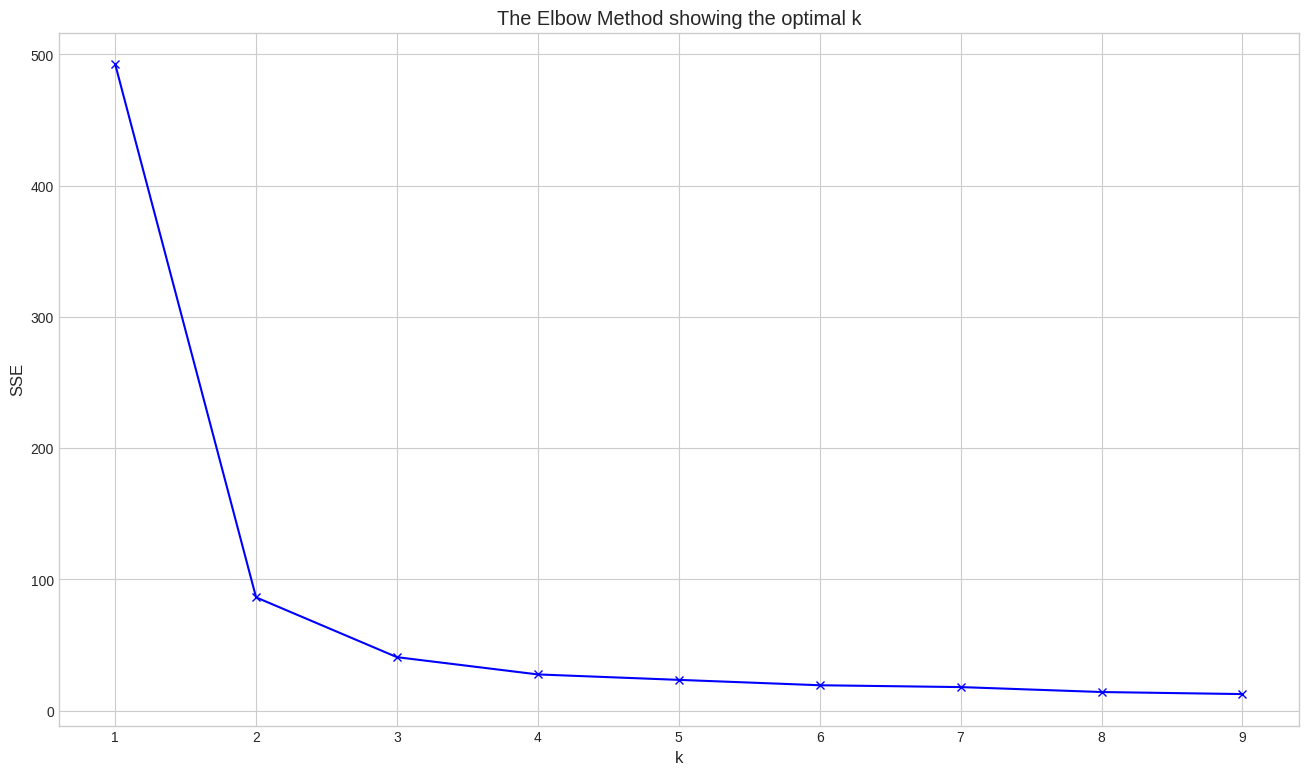

In [24]:
# Plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Kode ini digunakan untuk memplot grafik Elbow Method, yang menunjukkan hubungan antara jumlah cluster (￼) pada sumbu x dan nilai SSE (Sum of Squared Errors) pada sumbu y. Grafik ini dibuat menggunakan plt.plot(K, SSE, 'bx-'), dengan setiap titik ditandai simbol silang biru dan dihubungkan dengan garis. Label sumbu x (plt.xlabel('k')) dan y (plt.ylabel('SSE')), serta judul grafik (plt.title('The Elbow Method showing the optimal k')), ditambahkan untuk memberikan konteks pada grafik. Setelah plt.show() dijalankan, grafik akan tampil, dan Dapat mengidentifikasi elbow point (titik siku), yaitu jumlah cluster optimal yang memberikan keseimbangan terbaik antara kompleksitas model dan pengurangan SSE dimana untuk kondisi ini adalah 3 yang paling optimal.

## 3. Clustering Dataset

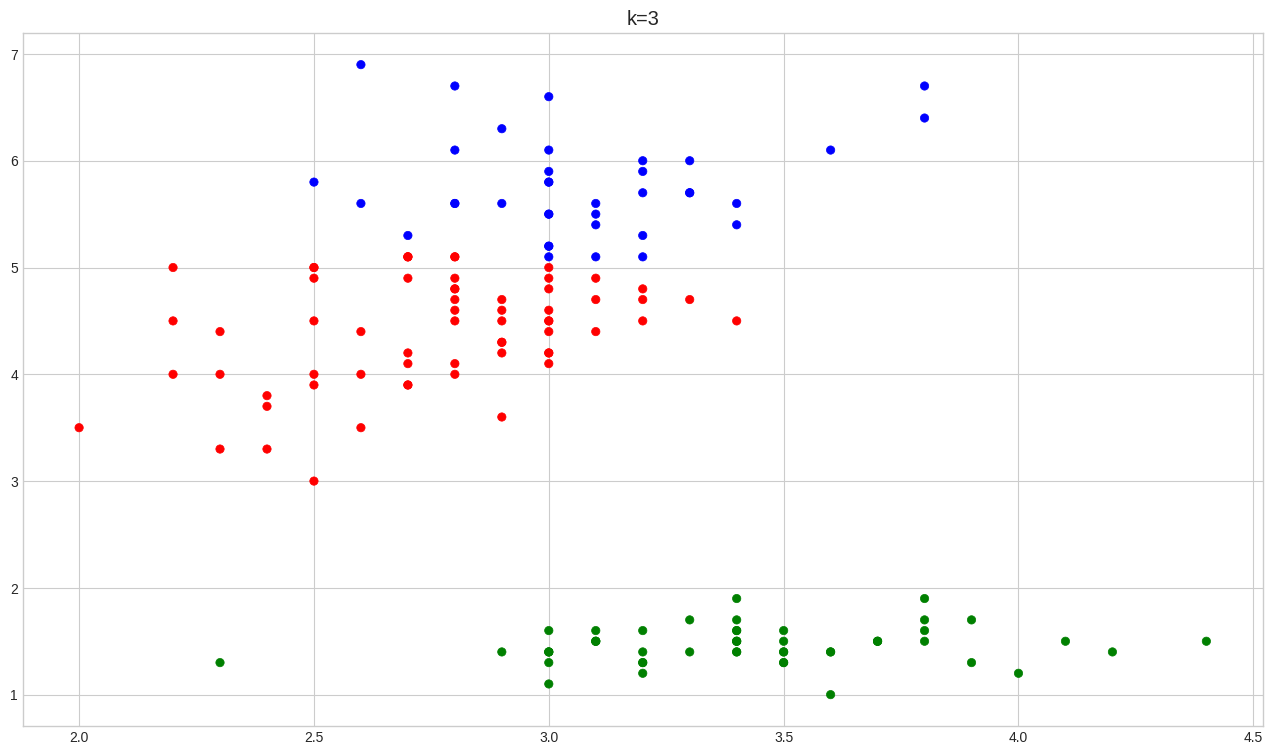

In [25]:
y_pred = KMeans(n_clusters=3).fit_predict(X)

LABEL_COLOR_MAP = {
    0: 'r',
    1: 'g',
    2: 'b'
}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(features[1], features[2], c=label_color)
plt.title("k=3")
plt.show()

Kode ini digunakan untuk melakukan clustering pada dataset dengan K-Means menggunakan K=3 (jumlah cluster) dan memvisualisasikan hasil clustering dalam bentuk scatterplot.

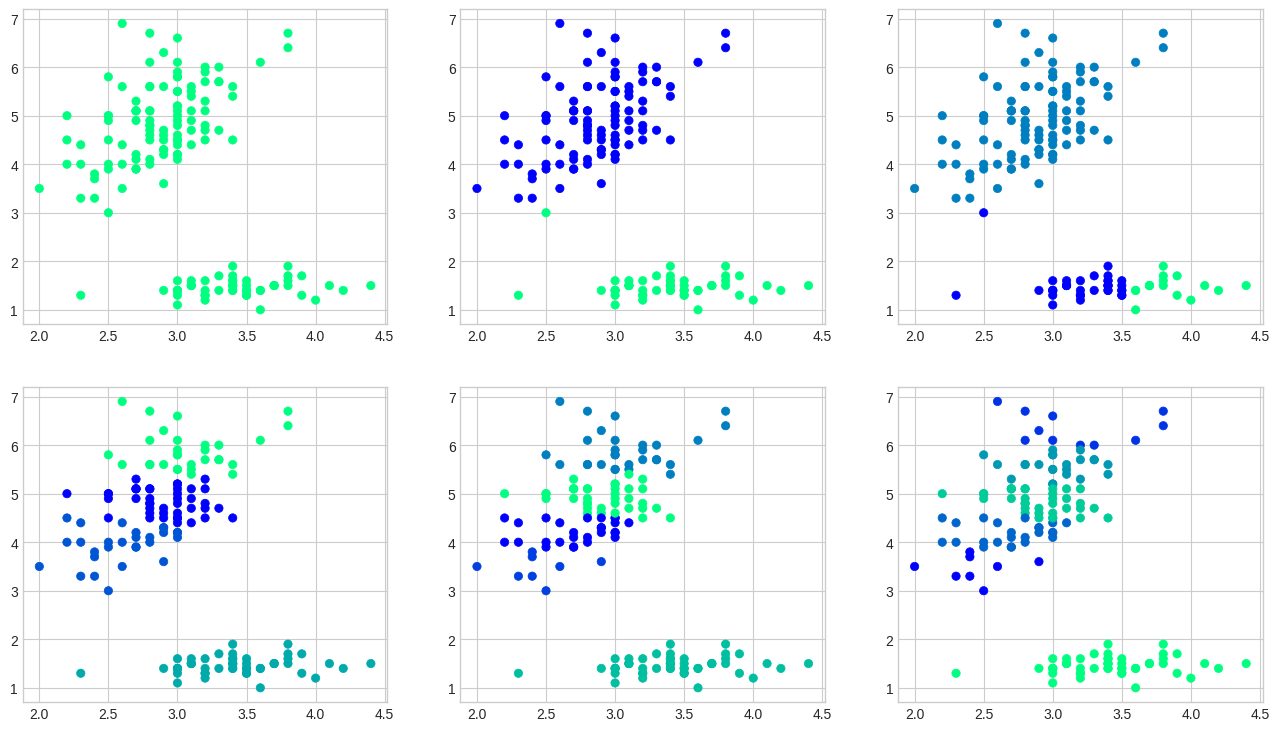

In [29]:
figure, ax = plt.subplots(2, 3)
K = range(1, 7)

for k in K:
    if k < 4:
        row = 0
        column = k - 1
    else:
        row = 1
        column = k - 4

    kmeanModel = KMeans(n_clusters=k).fit(X)
    y_pred = kmeanModel.fit_predict(X)
    ax[row][column].scatter(features[1], features[2], c=y_pred, cmap='winter_r')

plt.show()

Kode ini digunakan untuk memvisualisasikan hasil clustering dengan K-Means untuk berbagai nilai K (dari 1 hingga 6), yang ditampilkan dalam sebuah grid 2x3 menggunakan subplots.